#Data collection
# note can skip step if data already provided in csv format


In [ ]:
import requests
import pandas as pd
#get api key from alphavantage
# each api key makes 25 requests
# api documentation:https://www.alphavantage.co/documentation/
apikey=''

url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=META&outputsize=full&apikey='+apikey
r = requests.get(url)
data = r.json()

print(data)

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'META', '3. Last Refreshed': '2023-12-01', '4. Output Size': 'Full size', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2023-12-01': {'1. open': '325.4800', '2. high': '326.8600', '3. low': '320.7600', '4. close': '324.8200', '5. volume': '15276375'}, '2023-11-30': {'1. open': '331.8900', '2. high': '333.5000', '3. low': '322.4037', '4. close': '327.1500', '5. volume': '23146387'}, '2023-11-29': {'1. open': '339.6900', '2. high': '339.9000', '3. low': '330.7800', '4. close': '332.2000', '5. volume': '16024497'}, '2023-11-28': {'1. open': '333.4000', '2. high': '339.3750', '3. low': '333.4000', '4. close': '338.9900', '5. volume': '12637245'}, '2023-11-27': {'1. open': '336.1800', '2. high': '339.9000', '3. low': '334.2000', '4. close': '334.7000', '5. volume': '15684454'}, '2023-11-24': {'1. open': '340.1300', '2. high': '341.8556', '3. low': '336.7700', '4. close': '338.2300', 

In [ ]:
daily_data=pd.DataFrame.from_dict(data['Time Series (Daily)']).T

In [ ]:
daily_data.columns

Index(['1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')

In [ ]:
daily_data.rename(columns={'1. open':'open','2. high': 'high','3. low': 'low','4. close': 'close','5. volume': 'volume'},inplace=True)

In [ ]:
daily_data

,open,high,low,close,volume
2023-12-01,325.4800,326.8600,320.7600,324.8200,15276375
2023-11-30,331.8900,333.5000,322.4037,327.1500,23146387
2023-11-29,339.6900,339.9000,330.7800,332.2000,16024497
2023-11-28,333.4000,339.3750,333.4000,338.9900,12637245
2023-11-27,336.1800,339.9000,334.2000,334.7000,15684454
...,...,...,...,...,...
2012-05-24,32.9500,33.2100,31.7700,33.0300,50237200
2012-05-23,31.3700,32.5000,31.3600,32.0000,73600000
2012-05-22,32.6100,33.5900,30.9400,31.0000,101786600
2012-05-21,36.5300,36.6600,33.0000,34.0300,168192700


In [ ]:
daily_data=daily_data[::-1]

#Collecting Sentiment data

In [ ]:

import requests
import pandas as pd
apikey=''
#sentiment api from alpha vantage, reach documentation of api for the same
# api documentation:https://www.alphavantage.co/documentation/

url = 'https://www.alphavantage.co/query?function=NEWS_SENTIMENT&time_from=20231130T0000&time_to=20231201T0000&sort=EARLIEST&symbol=META&limit=1000&apikey='+apikey
r = requests.get(url)
data = r.json()

print(data)

{'items': '995', 'sentiment_score_definition': 'x <= -0.35: Bearish; -0.35 < x <= -0.15: Somewhat-Bearish; -0.15 < x < 0.15: Neutral; 0.15 <= x < 0.35: Somewhat_Bullish; x >= 0.35: Bullish', 'relevance_score_definition': '0 < x <= 1, with a higher score indicating higher relevance.', 'feed': [{'title': 'Purpose Investments Inc. Announces 2023 Estimated Annual Income and Capital Gains Distributions', 'url': 'https://www.benzinga.com/pressreleases/23/11/g36014427/purpose-investments-inc-announces-2023-estimated-annual-income-and-capital-gains-distributions', 'time_published': '20231130T000000', 'authors': ['Globe Newswire'], 'summary': 'TORONTO, Nov. 29, 2023 ( GLOBE NEWSWIRE ) -- Purpose Investments Inc. ( "Purpose" ) today announced the estimated annual distributions of income and capital gains for its open-end exchange-traded funds and closed-end funds ( the "Funds" ) for the 2023 tax year.', 'banner_image': 'https://www.benzinga.com/next-assets/images/schema-image-default.png', 'sour

In [ ]:
all_date={}

In [ ]:
#Get news sentiment data along with count of news_feed on a particular day

news_data=pd.DataFrame.from_dict(data)
from datetime import datetime



for i in range(len(news_data['feed'])):

  #print(news_data['feed'][i]['time_published'].split('T')[0])
  date = datetime.strptime(news_data['feed'][i]['time_published'].split('T')[0],'%Y%m%d')
  if str(date.date()) not in all_date.keys():
    row={}
    row['sentiment_score']=float(news_data['feed'][i]['overall_sentiment_score'])
    row['sentiment_score_count']=1
    all_date[str(date.date())]=row
  else:
     all_date[str(date.date())]['sentiment_score']+=float(news_data['feed'][i]['overall_sentiment_score'])
     all_date[str(date.date())]['sentiment_score_count']+=1
  topic_df=pd.DataFrame.from_dict(news_data['feed'][i]['topics'])
  for i in topic_df.index:
    if topic_df['topic'][i] not in all_date[str(date.date())].keys():
      all_date[str(date.date())][topic_df['topic'][i]]=float(topic_df['relevance_score'][i])
      all_date[str(date.date())][topic_df['topic'][i]+'_count']=1
    else:
      all_date[str(date.date())][topic_df['topic'][i]]+=float(topic_df['relevance_score'][i])
      all_date[str(date.date())][topic_df['topic'][i]+'_count']+=1
date_data=date_data.append(pd.DataFrame.from_dict(all_date).T)









<ipython-input-621-5560c8542109>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  date_data=date_data.append(pd.DataFrame.from_dict(all_date).T)


In [ ]:
date_data

,sentiment_score,sentiment_score_count,Economy - Monetary,Economy - Monetary_count,Financial Markets,Financial Markets_count,Earnings,Earnings_count,Mergers & Acquisitions,Mergers & Acquisitions_count,...,Manufacturing,Manufacturing_count,Blockchain,Blockchain_count,Life Sciences,Life Sciences_count,IPO,IPO_count,Economy - Macro,Economy - Macro_count
2022-03-01,-9.984503,81.0,14.934540,36.0,21.401228,43.0,19.048500,29.0,0.317038,2.0,...,6.283333,11.0,2.229023,5.0,1.866667,4.0,0.317038,2.0,NaN,NaN
2022-03-02,-14.146713,101.0,26.199207,44.0,28.242590,54.0,12.515886,17.0,0.634076,4.0,...,13.816665,24.0,5.731243,10.0,0.533333,2.0,0.634076,4.0,1.401891,5.0
2022-03-03,-11.848008,137.0,23.161159,49.0,43.513116,86.0,25.744726,45.0,1.792593,6.0,...,15.376189,27.0,9.254361,21.0,5.426190,10.0,1.237894,5.0,0.792595,5.0
2022-03-04,-6.878165,521.0,38.196757,81.0,179.701588,370.0,241.819087,334.0,4.054783,19.0,...,89.366664,119.0,11.753047,23.0,46.449998,63.0,3.116059,15.0,1.109633,7.0
2022-03-05,-17.227530,110.0,15.914579,37.0,21.925527,50.0,11.147061,26.0,1.396413,6.0,...,15.899999,25.0,4.208931,12.0,0.750000,2.0,NaN,NaN,0.475557,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-25,98.531333,570.0,20.637232,64.0,171.208939,290.0,91.407416,140.0,6.232978,45.0,...,60.916661,89.0,11.358302,33.0,25.116661,48.0,8.977813,22.0,0.768532,3.0
2023-11-26,74.716848,430.0,18.801166,53.0,110.853209,208.0,67.144679,101.0,3.355789,22.0,...,44.083332,59.0,7.046877,16.0,20.666665,29.0,5.424800,13.0,0.475557,3.0
2023-11-28,172.816891,998.0,54.485686,134.0,305.642481,590.0,147.303042,245.0,8.036273,45.0,...,120.366651,193.0,25.113116,64.0,76.449988,131.0,12.421950,49.0,3.932717,22.0
2023-11-29,168.961605,1000.0,61.568733,159.0,359.430769,645.0,194.852944,323.0,6.553466,36.0,...,104.649991,163.0,19.286465,50.0,68.583332,96.0,13.754407,39.0,2.847147,17.0


In [ ]:
temp=date_data

# Cleaning

In [ ]:
# average out sentiment data with count columns and then drop count columns
for i in temp.columns:
    if 'count' not in i:
            temp[i]=temp[i]/temp[i+'_count']
            temp.drop(columns=[i+'_count'],inplace=True)


            sentiment_score  Economy - Monetary  Financial Markets  Earnings  \
2022-03-01        -0.123265            0.414848           0.497703  0.656845   
2022-03-02        -0.140066            0.595437           0.523011  0.736229   
2022-03-03        -0.086482            0.472677           0.505966  0.572105   
2022-03-04        -0.013202            0.471565           0.485680  0.724009   
2022-03-05        -0.156614            0.430124           0.438511  0.428733   
...                     ...                 ...                ...       ...   
2023-11-25         0.172862            0.322457           0.590376  0.652910   
2023-11-26         0.173760            0.354739           0.532948  0.664799   
2023-11-28         0.173163            0.406610           0.518038  0.601237   
2023-11-29         0.168962            0.387225           0.557257  0.603260   
2023-11-30         0.176685            0.410365           0.538478  0.616144   

            Mergers & Acquisitions  Tec

In [ ]:
daily_data

,open,high,low,close,volume
2012-05-18,42.0500,45.0000,38.0000,38.2318,573576400
2012-05-21,36.5300,36.6600,33.0000,34.0300,168192700
2012-05-22,32.6100,33.5900,30.9400,31.0000,101786600
2012-05-23,31.3700,32.5000,31.3600,32.0000,73600000
2012-05-24,32.9500,33.2100,31.7700,33.0300,50237200
...,...,...,...,...,...
2023-11-27,336.1800,339.9000,334.2000,334.7000,15684454
2023-11-28,333.4000,339.3750,333.4000,338.9900,12637245
2023-11-29,339.6900,339.9000,330.7800,332.2000,16024497
2023-11-30,331.8900,333.5000,322.4037,327.1500,23146387


In [ ]:
# join sentiment data and stock price data
result =  temp.join(daily_data, how='outer')

In [ ]:
result.index

Index(['2012-05-18', '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
       '2012-05-25', '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01',
       ...
       '2023-11-21', '2023-11-22', '2023-11-24', '2023-11-25', '2023-11-26',
       '2023-11-27', '2023-11-28', '2023-11-29', '2023-11-30', '2023-12-01'],
      dtype='object', length=2956)

In [ ]:
final_data=result.tail(534)

In [ ]:
# fill null values
final_data.fillna(method='ffill',inplace=True)
final_data.fillna(method='bfill',inplace=True)

<ipython-input-647-517801f645f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data.fillna(method='ffill',inplace=True)
<ipython-input-647-517801f645f2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data.fillna(method='bfill',inplace=True)


In [ ]:
final_data

,sentiment_score,Economy - Monetary,Financial Markets,Earnings,Mergers & Acquisitions,Technology,Finance,Real Estate & Construction,Energy & Transportation,Economy - Fiscal,...,Manufacturing,Blockchain,Life Sciences,IPO,Economy - Macro,open,high,low,close,volume
2022-01-03,-0.123265,0.414848,0.497703,0.656845,0.158519,0.686458,0.676042,0.440000,0.670000,0.158519,...,0.571212,0.445805,0.466667,0.158519,0.280378,338.2950,341.0816,337.1900,338.5400,14562849
2022-01-04,-0.123265,0.414848,0.497703,0.656845,0.158519,0.686458,0.676042,0.440000,0.670000,0.158519,...,0.571212,0.445805,0.466667,0.158519,0.280378,339.9500,343.0854,331.8711,336.5300,15997974
2022-01-05,-0.123265,0.414848,0.497703,0.656845,0.158519,0.686458,0.676042,0.440000,0.670000,0.158519,...,0.571212,0.445805,0.466667,0.158519,0.280378,333.0200,335.7600,323.8400,324.1700,20564521
2022-01-06,-0.123265,0.414848,0.497703,0.656845,0.158519,0.686458,0.676042,0.440000,0.670000,0.158519,...,0.571212,0.445805,0.466667,0.158519,0.280378,322.8200,339.1650,322.7200,332.4600,27962809
2022-01-07,-0.123265,0.414848,0.497703,0.656845,0.158519,0.686458,0.676042,0.440000,0.670000,0.158519,...,0.571212,0.445805,0.466667,0.158519,0.280378,332.7400,337.0000,328.8801,331.7900,14722020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-27,0.173760,0.354739,0.532948,0.664799,0.152536,0.785417,0.726027,0.688889,0.712963,0.158519,...,0.747175,0.440430,0.712644,0.417292,0.158519,336.1800,339.9000,334.2000,334.7000,15684454
2023-11-28,0.173163,0.406610,0.518038,0.601237,0.178584,0.736317,0.639474,0.652516,0.676357,0.197376,...,0.623661,0.392392,0.583588,0.253509,0.178760,333.4000,339.3750,333.4000,338.9900,12637245
2023-11-29,0.168962,0.387225,0.557257,0.603260,0.182041,0.731106,0.665000,0.739216,0.710494,0.219868,...,0.642024,0.385729,0.714410,0.352677,0.167479,339.6900,339.9000,330.7800,332.2000,16024497
2023-11-30,0.176685,0.410365,0.538478,0.616144,0.172273,0.772312,0.695710,0.694444,0.717320,0.206073,...,0.680510,0.339561,0.781713,0.291561,0.190695,331.8900,333.5000,322.4037,327.1500,23146387


#saving data

In [ ]:
final_data.to_csv('meta_sentiment.csv')

#feature engineering

In [ ]:
import pandas as pd
final_data=pd.read_csv('meta_sentiment.csv')

In [ ]:
final_data.columns

Index(['Unnamed: 0', 'sentiment_score', 'Economy - Monetary',
       'Financial Markets', 'Earnings', 'Mergers & Acquisitions', 'Technology',
       'Finance', 'Real Estate & Construction', 'Energy & Transportation',
       'Economy - Fiscal', 'Retail & Wholesale', 'Manufacturing', 'Blockchain',
       'Life Sciences', 'IPO', 'Economy - Macro', 'open', 'high', 'low',
       'close', 'volume'],
      dtype='object')

# making esg sentiment columns i.e e_sentiment, s_sentiment and g_sentiment

Environment
1. Blockchain: Blockchain technology has significant environmental implications, particularly in terms of energy consumption. Cryptocurrencies like Bitcoin, which are based on blockchain, are known for their high energy usage during the mining process1.
2. Energy & Transportation: This category directly relates to the environment as it involves the production and consumption of energy, as well as transportation systems, both of which have significant environmental impacts.
3. Manufacturing: Manufacturing processes often have significant environmental impacts, including pollution and resource depletion.
4. Real Estate & Construction: These sectors can have significant environmental impacts, including land use changes, resource consumption, and waste generation.

Social
1. Earnings: Earnings relate to income and wealth distribution, which are key social issues.
2. Life Sciences: This field includes healthcare and biotechnology, which have significant social implications in terms of health outcomes and ethical considerations.
3. Retail & Wholesale: These sectors are part of the consumer economy and relate to social issues such as consumer behavior and employment.
4. Technology: Technology has significant social implications, including impacts on communication, privacy, and employment.

Government
1. IPO: Initial Public Offerings (IPOs) are regulated by government entities like the Securities and Exchange Commission in the U.S., making them a government aspect.
2. Mergers & Acquisitions: These are also regulated by government entities to prevent anti-competitive practices.
3. Financial Markets: Financial markets are heavily regulated by government entities to maintain stability and protect consumers.
4. Economy - Fiscal Policy (e.g., tax reform, government spending): Fiscal policy is a direct function of government, involving decisions about government spending and taxation.
5. Economy - Monetary Policy (e.g., interest rates, inflation): Monetary policy is also a direct function of government, typically managed by a central bank.
6. Economy - Macro/Overall: The overall economy is influenced by government policies and regulations.
7. Finance: While finance has social and environmental aspects, it is also heavily regulated by government entities, making it a government aspect as well.






In [ ]:

final_data['e_sentiment']=(final_data['Blockchain']+final_data['Energy & Transportation']+final_data['Manufacturing']+final_data['Real Estate & Construction'])/4
final_data['s_sentiment']=(final_data['Earnings']+final_data['Life Sciences']+final_data['Retail & Wholesale']+final_data['Technology'])/4
final_data['g_sentiment']=(final_data['IPO']+final_data['Mergers & Acquisitions']+final_data['Financial Markets']+final_data['Economy - Monetary']+final_data['Economy - Fiscal']+final_data['Economy - Macro']+final_data['Finance'])/7

In [ ]:
final_data.rename(columns={'Unnamed: 0':'date'},inplace=True)


# df with all sentiment columns i.e final_1

In [ ]:

final_1=final_data[['date','sentiment_score', 'Economy - Monetary',
       'Financial Markets', 'Earnings', 'Mergers & Acquisitions', 'Technology',
       'Finance', 'Real Estate & Construction', 'Energy & Transportation',
       'Economy - Fiscal', 'Retail & Wholesale', 'Manufacturing', 'Blockchain',
       'Life Sciences', 'IPO', 'Economy - Macro','close','volume']]


# df with esg sentiment columns i.e final_2

In [ ]:
# df with sentiment columns reduces to e,s and g sentiments
final_2=final_data[['date','close','volume','e_sentiment','s_sentiment','g_sentiment','sentiment_score']]

In [ ]:
final_1

,date,sentiment_score,Economy - Monetary,Financial Markets,Earnings,Mergers & Acquisitions,Technology,Finance,Real Estate & Construction,Energy & Transportation,Economy - Fiscal,Retail & Wholesale,Manufacturing,Blockchain,Life Sciences,IPO,Economy - Macro,close,volume
0,2022-01-03,-0.123265,0.414848,0.497703,0.656845,0.158519,0.686458,0.676042,0.440000,0.670000,0.158519,0.595833,0.571212,0.445805,0.466667,0.158519,0.280378,338.54,14562849
1,2022-01-04,-0.123265,0.414848,0.497703,0.656845,0.158519,0.686458,0.676042,0.440000,0.670000,0.158519,0.595833,0.571212,0.445805,0.466667,0.158519,0.280378,336.53,15997974
2,2022-01-05,-0.123265,0.414848,0.497703,0.656845,0.158519,0.686458,0.676042,0.440000,0.670000,0.158519,0.595833,0.571212,0.445805,0.466667,0.158519,0.280378,324.17,20564521
3,2022-01-06,-0.123265,0.414848,0.497703,0.656845,0.158519,0.686458,0.676042,0.440000,0.670000,0.158519,0.595833,0.571212,0.445805,0.466667,0.158519,0.280378,332.46,27962809
4,2022-01-07,-0.123265,0.414848,0.497703,0.656845,0.158519,0.686458,0.676042,0.440000,0.670000,0.158519,0.595833,0.571212,0.445805,0.466667,0.158519,0.280378,331.79,14722020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2023-11-27,0.173760,0.354739,0.532948,0.664799,0.152536,0.785417,0.726027,0.688889,0.712963,0.158519,0.734848,0.747175,0.440430,0.712644,0.417292,0.158519,334.70,15684454
530,2023-11-28,0.173163,0.406610,0.518038,0.601237,0.178584,0.736317,0.639474,0.652516,0.676357,0.197376,0.657353,0.623661,0.392392,0.583588,0.253509,0.178760,338.99,12637245
531,2023-11-29,0.168962,0.387225,0.557257,0.603260,0.182041,0.731106,0.665000,0.739216,0.710494,0.219868,0.596970,0.642024,0.385729,0.714410,0.352677,0.167479,332.20,16024497
532,2023-11-30,0.176685,0.410365,0.538478,0.616144,0.172273,0.772312,0.695710,0.694444,0.717320,0.206073,0.579437,0.680510,0.339561,0.781713,0.291561,0.190695,327.15,23146387


# Calculating pct_change columns

1. pct_change_1d: {(nth day close price)-([n-1]th day close price)}/[n-1]th day close price)*100
2. pct_change_3d: {(nth day close price)-([n-3]th day close price)}/[n-3]th day close price)*100
3. pct_change_7d: {(nth day close price)-([n-7]th day close price)}/[n-7]th day close price)*100

In [ ]:

final_1['pct_change_1d']=final_1['close'].pct_change()
final_1['pct_change_3d']=final_1['close'].pct_change(periods=3)
final_1['pct_change_7d']=final_1['close'].pct_change(periods=7)

<ipython-input-8-168d5c437bfe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_1['pct_change_1d']=final_1['close'].pct_change()
<ipython-input-8-168d5c437bfe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_1['pct_change_3d']=final_1['close'].pct_change(periods=3)
<ipython-input-8-168d5c437bfe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [ ]:
final_2

,date,close,volume,e_sentiment,s_sentiment,g_sentiment,sentiment_score
0,2022-01-03,338.54,14562849,0.531754,0.601451,0.334933,-0.123265
1,2022-01-04,336.53,15997974,0.531754,0.601451,0.334933,-0.123265
2,2022-01-05,324.17,20564521,0.531754,0.601451,0.334933,-0.123265
3,2022-01-06,332.46,27962809,0.531754,0.601451,0.334933,-0.123265
4,2022-01-07,331.79,14722020,0.531754,0.601451,0.334933,-0.123265
...,...,...,...,...,...,...,...
529,2023-11-27,334.70,15684454,0.647364,0.724427,0.357226,0.173760
530,2023-11-28,338.99,12637245,0.586232,0.644624,0.338907,0.173163
531,2023-11-29,332.20,16024497,0.619366,0.661436,0.361649,0.168962
532,2023-11-30,327.15,23146387,0.607959,0.687401,0.357879,0.176685


In [ ]:
final_2['pct_change_1d']=final_2['close'].pct_change()
final_2['pct_change_3d']=final_2['close'].pct_change(periods=3)
final_2['pct_change_7d']=final_2['close'].pct_change(periods=7)

<ipython-input-10-d40e6c131426>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_2['pct_change_1d']=final_2['close'].pct_change()
<ipython-input-10-d40e6c131426>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_2['pct_change_3d']=final_2['close'].pct_change(periods=3)
<ipython-input-10-d40e6c131426>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

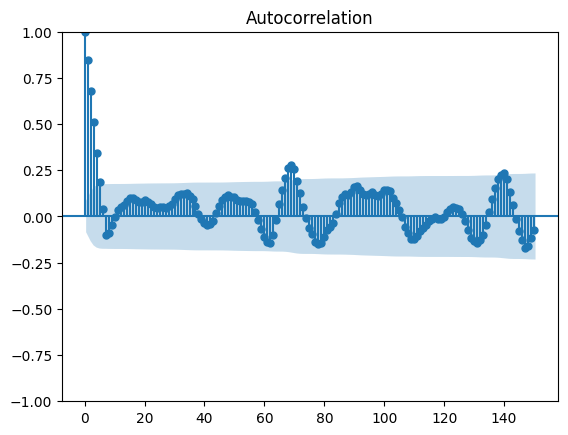

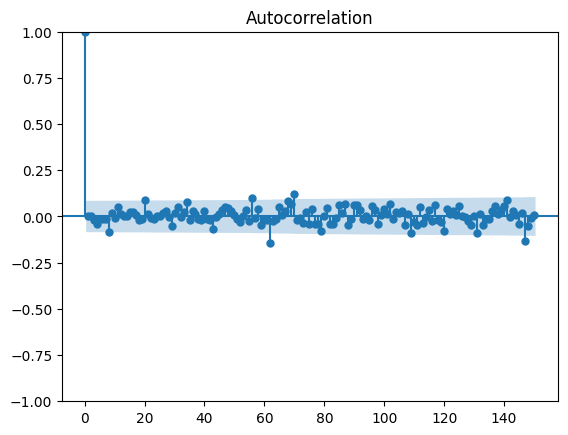

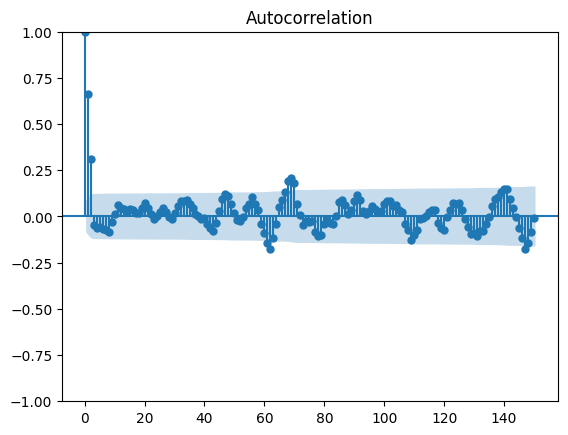

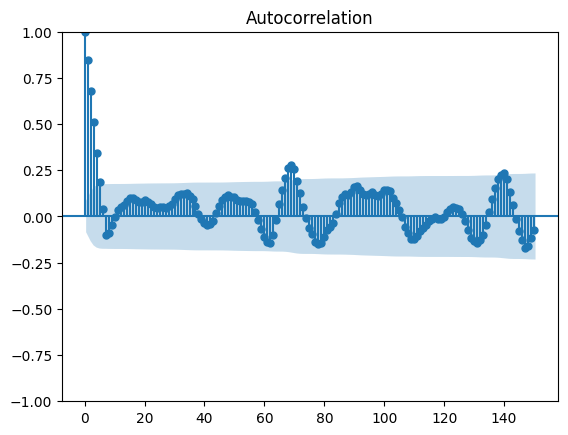

In [ ]:
# acf plots of pct_change_columns
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(final_1['pct_change_1d'].iloc[1:], lags=150)
plot_acf(final_1['pct_change_3d'].iloc[3:], lags=150)
plot_acf(final_1['pct_change_7d'].iloc[7:], lags=150)


# durbin watson score of pct_change_1d

In [ ]:

import numpy as np
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.stattools import durbin_watson
ols_residual = OLS(final_1['pct_change_1d'].iloc[1:],np.ones(len(final_1['pct_change_1d'].iloc[1:]))).fit()
durbin_watson(ols_residual.resid)

1.9941606671975922

# durbin watson score of pct_change_3d

In [ ]:
ols_residual = OLS(final_1['pct_change_3d'].iloc[3:],np.ones(len(final_1['pct_change_3d'].iloc[3:]))).fit()
durbin_watson(ols_residual.resid)

0.6734343373931037

# durbin watson score of pct_change_7d

In [ ]:
ols_residual = OLS(final_1['pct_change_7d'].iloc[7:],np.ones(len(final_1['pct_change_7d'].iloc[7:]))).fit()
durbin_watson(ols_residual.resid)

0.3009232933945343

# durbin watson score of remaning sentiment columns

In [ ]:
for i in final_1.columns:

  if i not in ['pct_change_1d','pct_change_3d','pct_change_7d','date']:
    ols_residual = OLS(final_1[i],np.ones(len(final_1[i]))).fit()
    print(i+'_dw:',durbin_watson(ols_residual.resid))

sentiment_score_dw: 0.06682089862007315
Economy - Monetary_dw: 0.5454683595656643
Financial Markets_dw: 1.3501576706755167
Earnings_dw: 0.6084390126572724
Mergers & Acquisitions_dw: 0.9963681312076128
Technology_dw: 0.8077478062891136
Finance_dw: 0.922836751968846
Real Estate & Construction_dw: 0.6933022728322964
Energy & Transportation_dw: 0.5007069596424946
Economy - Fiscal_dw: 0.7106929531706657
Retail & Wholesale_dw: 0.7820979825970357
Manufacturing_dw: 0.85727703234143
Blockchain_dw: 0.6464658902801803
Life Sciences_dw: 0.38428830588524
IPO_dw: 0.5681419096112543
Economy - Macro_dw: 0.843405602887587
close_dw: 0.009681594528153235
volume_dw: 0.6951209037192926


# durbin watson score of e_sentiment,s_sentiment and g_sentiment

In [ ]:
for i in final_2.columns:
  if i not in ['pct_change_1d','pct_change_3d','pct_change_7d','date']:
    ols_residual = OLS(final_2[i],np.ones(len(final_2[i]))).fit()
    print(i+'_dw:',durbin_watson(ols_residual.resid))

close_dw: 0.009681594528153235
volume_dw: 0.6951209037192926
e_sentiment_dw: 0.6339785098729314
s_sentiment_dw: 0.552726798300795
g_sentiment_dw: 1.0015236541589978
sentiment_score_dw: 0.06682089862007315


# correlation of pct_change_1d w.r.t to all columns

In [ ]:
#from statsmodels.tsa.stattools import grangercausalitytests
final_1[final_1.columns[1:]].iloc[1:].corr()['pct_change_1d'][:]

sentiment_score               0.111790
Economy - Monetary            0.016379
Financial Markets             0.043693
Earnings                     -0.011470
Mergers & Acquisitions        0.053477
Technology                    0.041430
Finance                      -0.041114
Real Estate & Construction    0.061071
Energy & Transportation      -0.055708
Economy - Fiscal              0.144356
Retail & Wholesale           -0.033760
Manufacturing                 0.070080
Blockchain                   -0.023501
Life Sciences                 0.015369
IPO                           0.054110
Economy - Macro              -0.058625
close                         0.036528
volume                       -0.122916
pct_change_1d                 1.000000
pct_change_3d                 0.582394
pct_change_7d                 0.359623
Name: pct_change_1d, dtype: float64

# correlation of pct_change_3d w.r.t to all columns

In [ ]:
final_1[final_1.columns[1:]].iloc[3:].corr()['pct_change_3d'][:]

sentiment_score               0.189521
Economy - Monetary           -0.003567
Financial Markets             0.058518
Earnings                     -0.043334
Mergers & Acquisitions        0.063982
Technology                    0.066150
Finance                      -0.051282
Real Estate & Construction    0.135018
Energy & Transportation      -0.029392
Economy - Fiscal              0.193600
Retail & Wholesale           -0.022546
Manufacturing                 0.101833
Blockchain                   -0.041592
Life Sciences                 0.056929
IPO                           0.124794
Economy - Macro              -0.100305
close                         0.065727
volume                       -0.131292
pct_change_1d                 0.582394
pct_change_3d                 1.000000
pct_change_7d                 0.636821
Name: pct_change_3d, dtype: float64

# correlation of pct_change_7d w.r.t to all columns

In [ ]:
final_1[final_1.columns[1:]].iloc[7:].corr()['pct_change_7d'][:]

sentiment_score               0.317293
Economy - Monetary            0.006174
Financial Markets             0.108682
Earnings                     -0.090637
Mergers & Acquisitions        0.038706
Technology                    0.065811
Finance                      -0.071920
Real Estate & Construction    0.183456
Energy & Transportation      -0.041090
Economy - Fiscal              0.272923
Retail & Wholesale           -0.043057
Manufacturing                 0.141877
Blockchain                   -0.103967
Life Sciences                 0.101590
IPO                           0.193175
Economy - Macro              -0.194501
close                         0.096729
volume                       -0.200763
pct_change_1d                 0.359623
pct_change_3d                 0.636821
pct_change_7d                 1.000000
Name: pct_change_7d, dtype: float64

# correlation of pct_change_1d w.r.t to e_sentiment,s_sentiment and g_sentiment

In [ ]:
final_2[final_2.columns[1:]].iloc[1:].corr()['pct_change_1d'][:]

close              0.036528
volume            -0.122916
e_sentiment        0.014650
s_sentiment        0.002543
g_sentiment        0.055020
sentiment_score    0.111790
pct_change_1d      1.000000
pct_change_3d      0.582394
pct_change_7d      0.359623
Name: pct_change_1d, dtype: float64

# correlation of pct_change_3d w.r.t to e_sentiment,s_sentiment and g_sentiment

In [ ]:
final_2[final_2.columns[1:]].iloc[3:].corr()['pct_change_3d'][:]

close              0.065727
volume            -0.131292
e_sentiment        0.065752
s_sentiment        0.026211
g_sentiment        0.084188
sentiment_score    0.189521
pct_change_1d      0.582394
pct_change_3d      1.000000
pct_change_7d      0.636821
Name: pct_change_3d, dtype: float64

# correlation of pct_change_7d w.r.t to e_sentiment,s_sentiment and g_sentiment

In [ ]:
final_2[final_2.columns[1:]].iloc[7:].corr()['pct_change_7d'][:]

close              0.096729
volume            -0.200763
e_sentiment        0.072526
s_sentiment        0.028106
g_sentiment        0.107996
sentiment_score    0.317293
pct_change_1d      0.359623
pct_change_3d      0.636821
pct_change_7d      1.000000
Name: pct_change_7d, dtype: float64

#grangercausalitytests on final_2

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
for i in final_2.columns:
  if i not in ['pct_change_1d','pct_change_3d','pct_change_7d','date']:
    print('grangercausalitytests for '+ i + 'and pct_change_1d')
    granger=grangercausalitytests(final_2[['pct_change_1d',i]].iloc[1:],50)


Streaming output truncated to the last 5000 lines.
likelihood ratio test: chi2=32.1309 , p=0.7369  , df=38
parameter F test:         F=0.7377  , p=0.8746  , df_denom=418, df_num=38

Granger Causality
number of lags (no zero) 39
ssr based F test:         F=0.7197  , p=0.8960  , df_denom=415, df_num=39
ssr based chi2 test:   chi2=33.4122 , p=0.7221  , df=39
likelihood ratio test: chi2=32.3308 , p=0.7662  , df=39
parameter F test:         F=0.7197  , p=0.8960  , df_denom=415, df_num=39

Granger Causality
number of lags (no zero) 40
ssr based F test:         F=0.7206  , p=0.8981  , df_denom=412, df_num=40
ssr based chi2 test:   chi2=34.4915 , p=0.7160  , df=40
likelihood ratio test: chi2=33.3384 , p=0.7627  , df=40
parameter F test:         F=0.7206  , p=0.8981  , df_denom=412, df_num=40

Granger Causality
number of lags (no zero) 41
ssr based F test:         F=0.7247  , p=0.8970  , df_denom=409, df_num=41
ssr based chi2 test:   chi2=35.7434 , p=0.7029  , df=41
likelihood ratio test: chi2=

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
for i in final_2.columns:
  if i not in ['pct_change_1d','pct_change_3d','pct_change_7d','date']:
    print('grangercausalitytests for '+ i + 'and pct_change_3d')
    granger=grangercausalitytests(final_2[['pct_change_3d',i]].iloc[3:],60)

Streaming output truncated to the last 5000 lines.
number of lags (no zero) 8
ssr based F test:         F=0.9011  , p=0.5152  , df_denom=506, df_num=8
ssr based chi2 test:   chi2=7.4513  , p=0.4888  , df=8
likelihood ratio test: chi2=7.3987  , p=0.4943  , df=8
parameter F test:         F=0.9011  , p=0.5152  , df_denom=506, df_num=8

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=0.8036  , p=0.6131  , df_denom=503, df_num=9
ssr based chi2 test:   chi2=7.5053  , p=0.5847  , df=9
likelihood ratio test: chi2=7.4518  , p=0.5902  , df=9
parameter F test:         F=0.8036  , p=0.6131  , df_denom=503, df_num=9

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=0.7872  , p=0.6412  , df_denom=500, df_num=10
ssr based chi2 test:   chi2=8.2026  , p=0.6091  , df=10
likelihood ratio test: chi2=8.1387  , p=0.6153  , df=10
parameter F test:         F=0.7872  , p=0.6412  , df_denom=500, df_num=10

Granger Causality
number of lags (no zero) 11
ssr based 

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
for i in final_2.columns:
  if i not in ['pct_change_1d','pct_change_3d','pct_change_7d','date']:
    print('grangercausalitytests for '+ i + 'and pct_change_3d')
    granger=grangercausalitytests(final_2[['pct_change_7d',i]].iloc[7:],60)

Streaming output truncated to the last 5000 lines.
number of lags (no zero) 8
ssr based F test:         F=1.0370  , p=0.4068  , df_denom=502, df_num=8
ssr based chi2 test:   chi2=8.5772  , p=0.3792  , df=8
likelihood ratio test: chi2=8.5071  , p=0.3856  , df=8
parameter F test:         F=1.0370  , p=0.4068  , df_denom=502, df_num=8

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=0.9201  , p=0.5072  , df_denom=499, df_num=9
ssr based chi2 test:   chi2=8.5960  , p=0.4754  , df=9
likelihood ratio test: chi2=8.5255  , p=0.4822  , df=9
parameter F test:         F=0.9201  , p=0.5072  , df_denom=499, df_num=9

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=0.9487  , p=0.4879  , df_denom=496, df_num=10
ssr based chi2 test:   chi2=9.8889  , p=0.4503  , df=10
likelihood ratio test: chi2=9.7955  , p=0.4586  , df=10
parameter F test:         F=0.9487  , p=0.4879  , df_denom=496, df_num=10

Granger Causality
number of lags (no zero) 11
ssr based 

In [ ]:
final_1.columns

Index(['date', 'sentiment_score', 'Economy - Monetary', 'Financial Markets',
       'Earnings', 'Mergers & Acquisitions', 'Technology', 'Finance',
       'Real Estate & Construction', 'Energy & Transportation',
       'Economy - Fiscal', 'Retail & Wholesale', 'Manufacturing', 'Blockchain',
       'Life Sciences', 'IPO', 'Economy - Macro', 'close', 'volume',
       'pct_change_1d', 'pct_change_3d', 'pct_change_7d'],
      dtype='object')

In [ ]:
final_2.columns

Index(['date', 'close', 'volume', 'e_sentiment', 's_sentiment', 'g_sentiment',
       'sentiment_score', 'pct_change_1d', 'pct_change_3d', 'pct_change_7d'],
      dtype='object')

# with all the test done above we conclude the model to be used is a VARMAX model


#MODEL TRAINING (Target variables: close,pct_change_1d,pct_change_3d,pct_change_7d)

# removing null rows from dataframes

In [ ]:
final_1_1d=final_1[['sentiment_score', 'Economy - Monetary', 'Financial Markets',
       'Earnings', 'Mergers & Acquisitions', 'Technology', 'Finance',
       'Real Estate & Construction', 'Energy & Transportation',
       'Economy - Fiscal', 'Retail & Wholesale', 'Manufacturing', 'Blockchain',
       'Life Sciences', 'IPO', 'Economy - Macro', 'close', 'volume',
       'pct_change_1d']].dropna()

final_1_3d=final_1[['sentiment_score', 'Economy - Monetary', 'Financial Markets',
       'Earnings', 'Mergers & Acquisitions', 'Technology', 'Finance',
       'Real Estate & Construction', 'Energy & Transportation',
       'Economy - Fiscal', 'Retail & Wholesale', 'Manufacturing', 'Blockchain',
       'Life Sciences', 'IPO', 'Economy - Macro', 'close', 'volume',
       'pct_change_3d']].dropna()

final_1_7d=final_1[['sentiment_score', 'Economy - Monetary', 'Financial Markets',
       'Earnings', 'Mergers & Acquisitions', 'Technology', 'Finance',
       'Real Estate & Construction', 'Energy & Transportation',
       'Economy - Fiscal', 'Retail & Wholesale', 'Manufacturing', 'Blockchain',
       'Life Sciences', 'IPO', 'Economy - Macro', 'close', 'volume',
       'pct_change_7d']].dropna()


In [ ]:
final_2_1d=final_2[['close', 'volume', 'e_sentiment', 's_sentiment', 'g_sentiment',
       'sentiment_score', 'pct_change_1d']].dropna()

final_2_3d=final_2[['close', 'volume', 'e_sentiment', 's_sentiment', 'g_sentiment',
       'sentiment_score', 'pct_change_3d']].dropna()

final_2_7d=final_2[['close', 'volume', 'e_sentiment', 's_sentiment', 'g_sentiment',
       'sentiment_score', 'pct_change_7d']].dropna()


#scaling data

In [ ]:
from sklearn.preprocessing import StandardScaler

std_scaler_1_1d = StandardScaler()
std_scaler_1_3d = StandardScaler()
std_scaler_1_7d = StandardScaler()

std_scaler_2_1d = StandardScaler()
std_scaler_2_3d = StandardScaler()
std_scaler_2_7d = StandardScaler()

final_1_1d_scaled = std_scaler_1_1d.fit_transform(final_1_1d.to_numpy())
final_1_3d_scaled = std_scaler_1_3d.fit_transform(final_1_3d.to_numpy())
final_1_7d_scaled = std_scaler_1_7d.fit_transform(final_1_7d.to_numpy())

final_2_1d_scaled = std_scaler_2_1d.fit_transform(final_2_1d.to_numpy())
final_2_3d_scaled = std_scaler_2_3d.fit_transform(final_2_3d.to_numpy())
final_2_7d_scaled = std_scaler_2_7d.fit_transform(final_2_7d.to_numpy())

final_1_1d_scaled=pd.DataFrame(final_1_1d_scaled, columns=final_1_1d.columns)
final_1_3d_scaled=pd.DataFrame(final_1_3d_scaled, columns=final_1_3d.columns)
final_1_7d_scaled=pd.DataFrame(final_1_7d_scaled, columns=final_1_7d.columns)

final_2_1d_scaled=pd.DataFrame(final_2_1d_scaled, columns=final_2_1d.columns)
final_2_3d_scaled=pd.DataFrame(final_2_3d_scaled, columns=final_2_3d.columns)
final_2_7d_scaled=pd.DataFrame(final_2_7d_scaled, columns=final_2_7d.columns)


# train and test split of data

In [ ]:
split=30

In [ ]:
len(final_1_1d_scaled)

533

In [ ]:
train_1_1d=final_1_1d_scaled[:-(split)]
train_1_3d=final_1_3d_scaled[:-(split)]
train_1_7d=final_1_7d_scaled[:-(split)]

test_1_1d=final_1_1d_scaled[-(split):]
test_1_3d=final_1_3d_scaled[-(split):]
test_1_7d=final_1_7d_scaled[-(split):]

In [ ]:
train_2_1d=final_2_1d_scaled[:-(split)]
train_2_3d=final_2_3d_scaled[:-(split)]
train_2_7d=final_2_7d_scaled[:-(split)]

test_2_1d=final_2_1d_scaled[-(split):]
test_2_3d=final_2_3d_scaled[-(split):]
test_2_7d=final_2_7d_scaled[-(split):]

#hyptertuning VARMAX model


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import VAR

# finding the best AR parameter for each model of pct_change_1d,pct_change_3d and pct_change_7d

In [ ]:

model=VAR(train_1_1d[1:])
sorted_order=model.select_order(maxlags=8)
print('1d_pct_change_lag')
print(sorted_order.summary())

model=VAR(train_1_3d[1:])
sorted_order=model.select_order(maxlags=8)
print('3d_pct_change_lag')
print(sorted_order.summary())

model=VAR(train_1_7d[1:])
sorted_order=model.select_order(maxlags=8)
print('7d_pct_change_lag')
print(sorted_order.summary())


lags: (1d=8,3d=8,7d=8)

In [ ]:
model=VAR(train_2_1d[1:])
sorted_order=model.select_order(maxlags=8)
print('1d_pct_change_lag')
print(sorted_order.summary())

model=VAR(train_2_3d[1:])
sorted_order=model.select_order(maxlags=8)
print('3d_pct_change_lag')
print(sorted_order.summary())

model=VAR(train_2_7d[1:])
sorted_order=model.select_order(maxlags=8)
print('7d_pct_change_lag')
print(sorted_order.summary())

1d_pct_change_lag
 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0      -1.138      -1.079      0.3203      -1.115
1      -11.90     -11.42*   6.800e-06     -11.71*
2      -12.00      -11.11   6.129e-06      -11.65
3     -12.04*      -10.73  5.923e-06*      -11.52
4      -11.97      -10.24   6.333e-06      -11.29
5      -11.89      -9.745   6.881e-06      -11.05
6      -11.77      -9.214   7.720e-06      -10.77
7      -11.69      -8.711   8.427e-06      -10.52
8      -11.61      -8.213   9.169e-06      -10.27
-------------------------------------------------
3d_pct_change_lag
 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0      -1.179      -1.120      0.3075      -1.156
1      -11.06      -10.59   1.566e-05      -10.88
2      -11.34      -10.44   1.189e-05      -10.99
3      -12.16 

lags=(1d=3,3d=4,7d=8)

#finding the best MA parameter for each model of pct_change_1d,pct_change_3d and pct_change_7d

In [ ]:
from statsmodels.tsa.statespace.varmax import VARMAX
best_aic = float('inf')
best_order = None
for w in range(0,4):
        varmax_model=VARMAX(train_2_1d,order=(3,w),enforce_stationarity=True)
        results = varmax_model.fit(maxiter=10)
        aic = results.aic
        if aic < best_aic:
            best_aic = aic
            best_order = w
        print(results.summary())

print("Best Order:", best_order)
print("Best AIC:", best_aic)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                                                    Statespace Model Results                                                                    
Dep. Variable:     ['close', 'volume', 'e_sentiment', 's_sentiment', 'g_sentiment', 'sentiment_score', 'pct_change_1d']   No. Observations:                  503
Model:                                                                                                           VAR(3)   Log Likelihood               -1809.486
                                                                                                            + intercept   AIC                           3982.972
Date:                                                                                                  Mon, 04 Dec 2023   BIC                           4751.119
Time:                                                                                                          12:15:08   HQIC                          4284.315
Sample:                           

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                                                    Statespace Model Results                                                                    
Dep. Variable:     ['close', 'volume', 'e_sentiment', 's_sentiment', 'g_sentiment', 'sentiment_score', 'pct_change_1d']   No. Observations:                  503
Model:                                                                                                       VARMA(3,1)   Log Likelihood               -1808.141
                                                                                                            + intercept   AIC                           4078.282
Date:                                                                                                  Mon, 04 Dec 2023   BIC                           5053.238
Time:                                                                                                          12:15:51   HQIC                          4460.755
Sample:                           

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                                                    Statespace Model Results                                                                    
Dep. Variable:     ['close', 'volume', 'e_sentiment', 's_sentiment', 'g_sentiment', 'sentiment_score', 'pct_change_1d']   No. Observations:                  503
Model:                                                                                                       VARMA(3,2)   Log Likelihood               -1805.997
                                                                                                            + intercept   AIC                           4171.993
Date:                                                                                                  Mon, 04 Dec 2023   BIC                           5353.759
Time:                                                                                                          12:16:49   HQIC                          4635.598
Sample:                           

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                                                    Statespace Model Results                                                                    
Dep. Variable:     ['close', 'volume', 'e_sentiment', 's_sentiment', 'g_sentiment', 'sentiment_score', 'pct_change_1d']   No. Observations:                  503
Model:                                                                                                       VARMA(3,3)   Log Likelihood               -1795.428
                                                                                                            + intercept   AIC                           4248.856
Date:                                                                                                  Mon, 04 Dec 2023   BIC                           5637.430
Time:                                                                                                          12:18:13   HQIC                          4793.591
Sample:                           

In [ ]:
from statsmodels.tsa.statespace.varmax import VARMAX
best_aic = float('inf')
best_order = None
for w in range(0,4):
        varmax_model=VARMAX(train_2_3d,order=(4,w),enforce_stationarity=True)
        results = varmax_model.fit(maxiter=10)
        aic = results.aic
        if aic < best_aic:
            best_aic = aic
            best_order = w
        print(results.summary())

print("Best Order:", best_order)
print("Best AIC:", best_aic)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                                                    Statespace Model Results                                                                    
Dep. Variable:     ['close', 'volume', 'e_sentiment', 's_sentiment', 'g_sentiment', 'sentiment_score', 'pct_change_3d']   No. Observations:                  501
Model:                                                                                                           VAR(4)   Log Likelihood               -1627.093
                                                                                                            + intercept   AIC                           3716.186
Date:                                                                                                  Mon, 04 Dec 2023   BIC                           4690.222
Time:                                                                                                          12:18:58   HQIC                          4098.364
Sample:                           

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                                                    Statespace Model Results                                                                    
Dep. Variable:     ['close', 'volume', 'e_sentiment', 's_sentiment', 'g_sentiment', 'sentiment_score', 'pct_change_3d']   No. Observations:                  501
Model:                                                                                                       VARMA(4,1)   Log Likelihood               -1620.659
                                                                                                            + intercept   AIC                           3801.317
Date:                                                                                                  Mon, 04 Dec 2023   BIC                           4981.967
Time:                                                                                                          12:20:01   HQIC                          4264.563
Sample:                           

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                                                    Statespace Model Results                                                                    
Dep. Variable:     ['close', 'volume', 'e_sentiment', 's_sentiment', 'g_sentiment', 'sentiment_score', 'pct_change_3d']   No. Observations:                  501
Model:                                                                                                       VARMA(4,2)   Log Likelihood               -1606.865
                                                                                                            + intercept   AIC                           3871.731
Date:                                                                                                  Mon, 04 Dec 2023   BIC                           5258.994
Time:                                                                                                          12:21:40   HQIC                          4416.044
Sample:                           

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                                                    Statespace Model Results                                                                    
Dep. Variable:     ['close', 'volume', 'e_sentiment', 's_sentiment', 'g_sentiment', 'sentiment_score', 'pct_change_3d']   No. Observations:                  501
Model:                                                                                                       VARMA(4,3)   Log Likelihood               -1554.503
                                                                                                            + intercept   AIC                           3865.007
Date:                                                                                                  Mon, 04 Dec 2023   BIC                           5458.884
Time:                                                                                                          12:24:08   HQIC                          4490.388
Sample:                           

In [ ]:
from statsmodels.tsa.statespace.varmax import VARMAX
best_aic = float('inf')
best_order = None
for w in range(0,4):
        varmax_model=VARMAX(train_2_7d,order=(8,w),enforce_stationarity=True)
        results = varmax_model.fit(maxiter=10)
        aic = results.aic
        if aic < best_aic:
            best_aic = aic
            best_order = w
        print(results.summary())

print("Best Order:", best_order)
print("Best AIC:", best_aic)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                                                    Statespace Model Results                                                                    
Dep. Variable:     ['close', 'volume', 'e_sentiment', 's_sentiment', 'g_sentiment', 'sentiment_score', 'pct_change_7d']   No. Observations:                  497
Model:                                                                                                           VAR(8)   Log Likelihood               -1354.087
                                                                                                            + intercept   AIC                           3562.173
Date:                                                                                                  Mon, 04 Dec 2023   BIC                           5359.241
Time:                                                                                                          12:27:09   HQIC                          4267.521
Sample:                           

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                                                    Statespace Model Results                                                                    
Dep. Variable:     ['close', 'volume', 'e_sentiment', 's_sentiment', 'g_sentiment', 'sentiment_score', 'pct_change_7d']   No. Observations:                  497
Model:                                                                                                       VARMA(8,1)   Log Likelihood               -1350.656
                                                                                                            + intercept   AIC                           3653.312
Date:                                                                                                  Mon, 04 Dec 2023   BIC                           5656.601
Time:                                                                                                          12:31:26   HQIC                          4439.601
Sample:                           

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


                                                                    Statespace Model Results                                                                    
Dep. Variable:     ['close', 'volume', 'e_sentiment', 's_sentiment', 'g_sentiment', 'sentiment_score', 'pct_change_7d']   No. Observations:                  497
Model:                                                                                                       VARMA(8,2)   Log Likelihood              -42947.197
                                                                                                            + intercept   AIC                          86944.395
Date:                                                                                                  Mon, 04 Dec 2023   BIC                          89153.905
Time:                                                                                                          12:35:25   HQIC                         87811.625
Sample:                           

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                                                    Statespace Model Results                                                                    
Dep. Variable:     ['close', 'volume', 'e_sentiment', 's_sentiment', 'g_sentiment', 'sentiment_score', 'pct_change_7d']   No. Observations:                  497
Model:                                                                                                       VARMA(8,3)   Log Likelihood               -1341.874
                                                                                                            + intercept   AIC                           3831.748
Date:                                                                                                  Mon, 04 Dec 2023   BIC                           6247.478
Time:                                                                                                          12:42:47   HQIC                          4779.920
Sample:                           

In [ ]:
from statsmodels.tsa.statespace.varmax import VARMAX


# training each model (1d,3d,7d) after hypertuning

In [ ]:
from statsmodels.tsa.statespace.varmax import VARMAX
varmax_model_2_1d=VARMAX(train_2_1d,order=(3,0),enforce_stationarity=True)
varmax_model_2_3d=VARMAX(train_2_3d,order=(4,0),enforce_stationarity=True)
varmax_model_2_7d=VARMAX(train_2_7d,order=(8,0),enforce_stationarity=True)

results_2_1d = varmax_model_2_1d.fit(maxiter=20)
results_2_3d = varmax_model_2_3d.fit(maxiter=20)
results_2_7d = varmax_model_2_7d.fit(maxiter=20)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#Making predicitions with 1d model




In [ ]:
n_forecast=split
predict_2_1d=results_2_1d.get_prediction(start=len(train_2_1d),end=len(train_2_1d)+split-1)

In [ ]:
column_list=['close_pred','volume_pred','e_sentiment_pred','s_sentiment_pred','g_sentiment_pred','sentiment_score_pred','pct_change_1d_pred']


In [ ]:
pred=predict_2_1d.predicted_mean
pred.columns=column_list

In [ ]:
pred

,close_pred,volume_pred,e_sentiment_pred,s_sentiment_pred,g_sentiment_pred,sentiment_score_pred,pct_change_1d_pred
503,1.297120,0.067380,-0.846245,0.331268,0.599611,1.097972,0.680085
504,1.283622,-0.192148,-0.610850,0.257379,0.065324,0.961562,-0.167547
505,1.274354,-0.062568,-0.503526,0.206858,-0.152700,0.929435,-0.087225
506,1.280926,-0.131209,-0.594054,0.016545,-0.084337,0.944858,0.060175
507,1.283711,-0.193273,-0.504567,-0.069924,-0.149647,0.907269,0.012052
508,1.283667,-0.205599,-0.444239,-0.095753,-0.189312,0.890695,-0.009578
509,1.286728,-0.225190,-0.436835,-0.136937,-0.210921,0.879548,0.018419
510,1.289504,-0.245646,-0.409060,-0.168665,-0.237201,0.861062,0.015887
511,1.292036,-0.259120,-0.378324,-0.180307,-0.251404,0.846297,0.012543
512,1.294856,-0.270537,-0.358542,-0.186176,-0.262942,0.833242,0.014773


In [ ]:
test_vs_pred=pd.concat([test_2_1d,pred],axis=1)

In [ ]:
test_vs_pred

,close,volume,e_sentiment,s_sentiment,g_sentiment,sentiment_score,pct_change_1d,close_pred,volume_pred,e_sentiment_pred,s_sentiment_pred,g_sentiment_pred,sentiment_score_pred,pct_change_1d_pred
503,1.053610,1.858446,0.675599,1.503158,0.801899,0.774482,-1.155571,1.297120,0.067380,-0.846245,0.331268,0.599611,1.097972,0.680085
504,1.174844,-0.023742,0.608355,0.646299,-0.039798,0.895740,0.874060,1.283622,-0.192148,-0.610850,0.257379,0.065324,0.961562,-0.167547
505,1.260633,-0.082672,0.608355,0.646299,-0.039798,0.895740,0.596539,1.274354,-0.062568,-0.503526,0.206858,-0.152700,0.929435,-0.087225
506,1.240524,-0.539462,0.707579,1.447566,1.090093,0.976811,-0.154849,1.280926,-0.131209,-0.594054,0.016545,-0.084337,0.944858,0.060175
507,1.393584,-0.488691,0.707579,1.447566,1.090093,0.976811,1.059211,1.283711,-0.193273,-0.504567,-0.069924,-0.149647,0.907269,0.012052
508,1.379407,-0.427932,2.265194,1.714986,1.276876,0.909435,-0.110517,1.283667,-0.205599,-0.444239,-0.095753,-0.189312,0.890695,-0.009578
509,1.433368,-0.674955,2.265194,1.714986,1.276876,0.909435,0.352388,1.286728,-0.225190,-0.436835,-0.136937,-0.210921,0.879548,0.018419
510,1.450729,-0.871691,2.265194,1.714986,1.276876,0.909435,0.102175,1.289504,-0.245646,-0.409060,-0.168665,-0.237201,0.861062,0.015887
511,1.494419,-0.812420,1.441094,0.884672,0.240889,0.866363,0.277926,1.292036,-0.259120,-0.378324,-0.180307,-0.251404,0.846297,0.012543
512,1.508307,-0.835050,0.155571,1.052227,0.493256,1.031104,0.077617,1.294856,-0.270537,-0.358542,-0.186176,-0.262942,0.833242,0.014773


# plotting predicted daily close price and actual close prices 5 day window with 1d model

<Axes: >

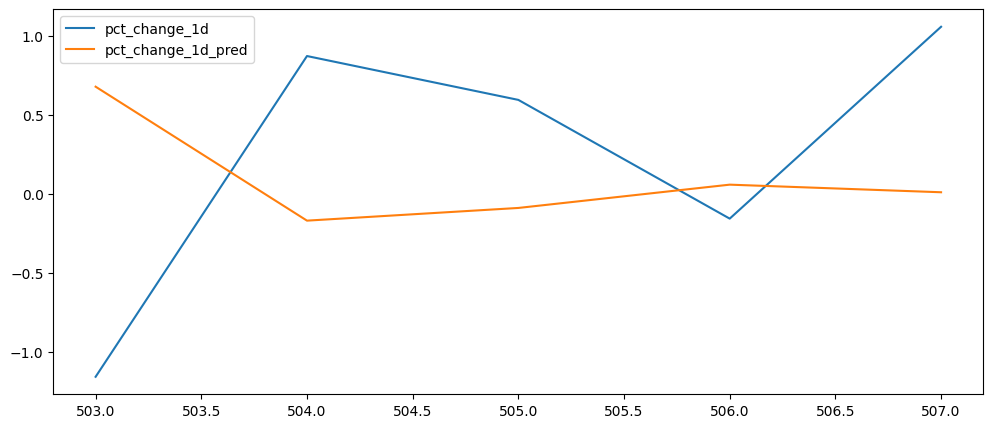

In [ ]:
test_vs_pred[['pct_change_1d','pct_change_1d_pred']].head(5).plot(figsize=(12,5))

<Axes: >

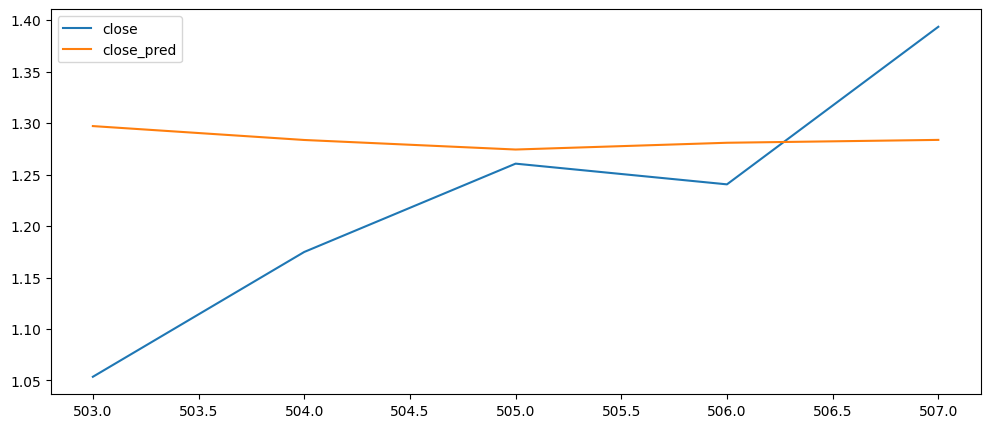

In [ ]:
test_vs_pred[['close','close_pred']].head(5).plot(figsize=(12,5))

# calculating rmse for predicted_pct_change and predicted_close in window size 5 days , 2 days and 30 days using 1d model

In [ ]:
from sklearn.metrics import mean_squared_error
import math
from statistics import mean
rmse_pct_change=math.sqrt(mean_squared_error(test_2_1d['close'].head(5),pred['close_pred'].head(5)))
rmse_close=math.sqrt(mean_squared_error(test_2_1d['pct_change_1d'].head(5),pred['pct_change_1d_pred'].head(5)))
print(rmse_pct_change,rmse_close)
rmse_pct_change=math.sqrt(mean_squared_error(test_2_1d['close'],pred['close_pred']))
rmse_close=math.sqrt(mean_squared_error(test_2_1d['pct_change_1d'],pred['pct_change_1d_pred']))
print(rmse_pct_change,rmse_close)
rmse_pct_change=math.sqrt(mean_squared_error(test_2_1d['close'].head(2),pred['close_pred'].head(2)))
rmse_close=math.sqrt(mean_squared_error(test_2_1d['pct_change_1d'].head(2),pred['pct_change_1d_pred'].head(2)))
print(rmse_pct_change,rmse_close)


0.13040101884915492 1.1013526222303116
0.33891134616139873 0.5421537874054289
0.18858619122615766 1.492410409630288


#unscaling data for 1d model

In [ ]:
unscaled_data = test_2_1d * std_scaler_2_1d.scale_ + std_scaler_2_1d.mean_
print(unscaled_data)

      close      volume  e_sentiment  s_sentiment  g_sentiment  \
503  288.35  66684141.0     0.631437     0.691813     0.368004   
504  296.73  29596256.0     0.628384     0.649972     0.352296   
505  302.66  28435053.0     0.628384     0.649972     0.352296   
506  301.27  19434168.0     0.632889     0.689098     0.373382   
507  311.85  20434580.0     0.632889     0.689098     0.373382   
508  310.87  21631820.0     0.703622     0.702156     0.376868   
509  314.60  16764315.0     0.703622     0.702156     0.376868   
510  315.80  12887699.0     0.703622     0.702156     0.376868   
511  318.82  14055614.0     0.666199     0.661612     0.357534   
512  319.78  13609704.0     0.607822     0.669794     0.362244   
513  320.55  16103071.0     0.607822     0.669794     0.362244   
514  328.77  19116921.0     0.607822     0.669794     0.362244   
515  329.19  16908948.0     0.627890     0.643634     0.360944   
516  336.31  17179403.0     0.627890     0.643634     0.360944   
517  332.7

In [ ]:
column_list=['close_pred','volume_pred','e_sentiment_pred','s_sentiment_pred','g_sentiment_pred','sentiment_score_pred','pct_change_3d_pred']


#Making predicitions with 3d model

In [ ]:
n_forecast=split
predict_2_3d=results_2_3d.get_prediction(start=len(train_2_3d),end=len(train_2_3d)+split-1)
pred=predict_2_3d.predicted_mean
pred.columns=column_list
test_vs_pred=pd.concat([test_2_3d,pred],axis=1)

#plotting predicted daily close price and actual close prices 5 day window with 3d model

<Axes: >

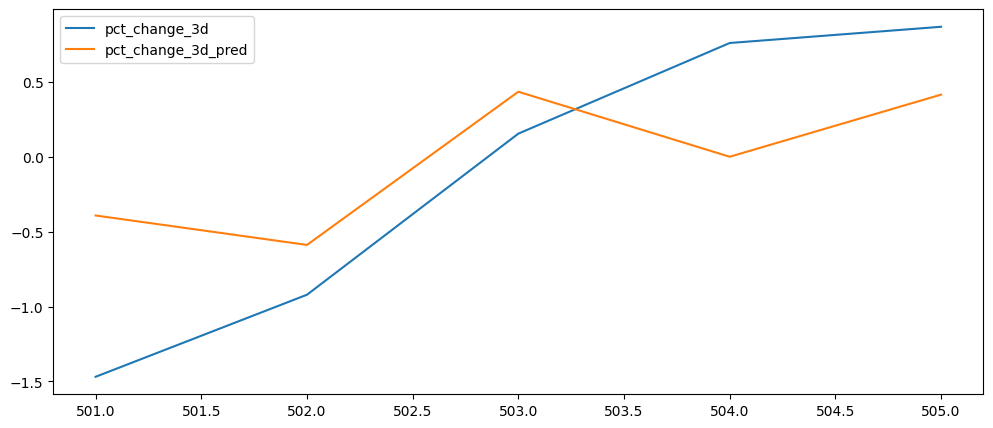

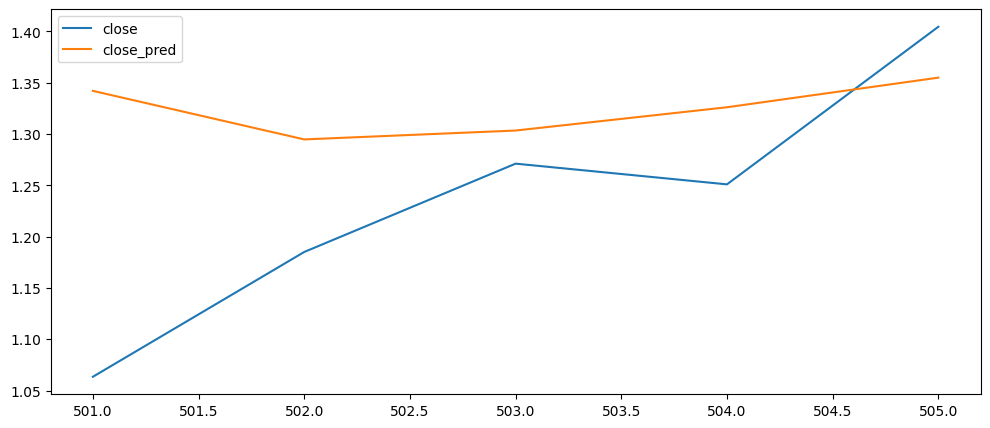

In [ ]:
test_vs_pred[['pct_change_3d','pct_change_3d_pred']].head(5).plot(figsize=(12,5))
test_vs_pred[['close','close_pred']].head(5).plot(figsize=(12,5))

#calculating rmse for predicted_pct_change and predicted_close in window size 5 days , 2 days and 30 days using 3d model

In [ ]:
from sklearn.metrics import mean_squared_error
import math
from statistics import mean
rmse_pct_change=math.sqrt(mean_squared_error(test_2_3d['close'].head(5),pred['close_pred'].head(5)))
rmse_close=math.sqrt(mean_squared_error(test_2_3d['pct_change_3d'].head(5),pred['pct_change_3d_pred'].head(5)))
print(rmse_pct_change,rmse_close)
rmse_pct_change=math.sqrt(mean_squared_error(test_2_3d['close'],pred['close_pred']))
rmse_close=math.sqrt(mean_squared_error(test_2_3d['pct_change_3d'],pred['pct_change_3d_pred']))
print(rmse_pct_change,rmse_close)
rmse_pct_change=math.sqrt(mean_squared_error(test_2_3d['close'].head(2),pred['close_pred'].head(2)))
rmse_close=math.sqrt(mean_squared_error(test_2_3d['pct_change_3d'].head(2),pred['pct_change_3d_pred'].head(2)))
print(rmse_pct_change,rmse_close)

0.14058591860809655 0.6533945131222549
0.2727446842574243 0.4090502360172056
0.21175088237236903 0.7976939024754975


#unscaling data for 3d model

In [ ]:
unscaled_data = test_2_3d * std_scaler_2_3d.scale_ + std_scaler_2_3d.mean_
print(unscaled_data)

      close      volume  e_sentiment  s_sentiment  g_sentiment  \
501  288.35  66684141.0     0.631437     0.691813     0.368004   
502  296.73  29596256.0     0.628384     0.649972     0.352296   
503  302.66  28435053.0     0.628384     0.649972     0.352296   
504  301.27  19434168.0     0.632889     0.689098     0.373382   
505  311.85  20434580.0     0.632889     0.689098     0.373382   
506  310.87  21631820.0     0.703622     0.702156     0.376868   
507  314.60  16764315.0     0.703622     0.702156     0.376868   
508  315.80  12887699.0     0.703622     0.702156     0.376868   
509  318.82  14055614.0     0.666199     0.661612     0.357534   
510  319.78  13609704.0     0.607822     0.669794     0.362244   
511  320.55  16103071.0     0.607822     0.669794     0.362244   
512  328.77  19116921.0     0.607822     0.669794     0.362244   
513  329.19  16908948.0     0.627890     0.643634     0.360944   
514  336.31  17179403.0     0.627890     0.643634     0.360944   
515  332.7

In [ ]:
column_list=['close_pred','volume_pred','e_sentiment_pred','s_sentiment_pred','g_sentiment_pred','sentiment_score_pred','pct_change_7d_pred']


#Making predicitions with 7d model

In [ ]:
n_forecast=split
predict_2_7d=results_2_7d.get_prediction(start=len(train_2_7d),end=len(train_2_7d)+split-1)
pred=predict_2_7d.predicted_mean
pred.columns=column_list
test_vs_pred=pd.concat([test_2_7d,pred],axis=1)

#plotting predicted daily close price and actual close prices 5 day window with 7d model

<Axes: >

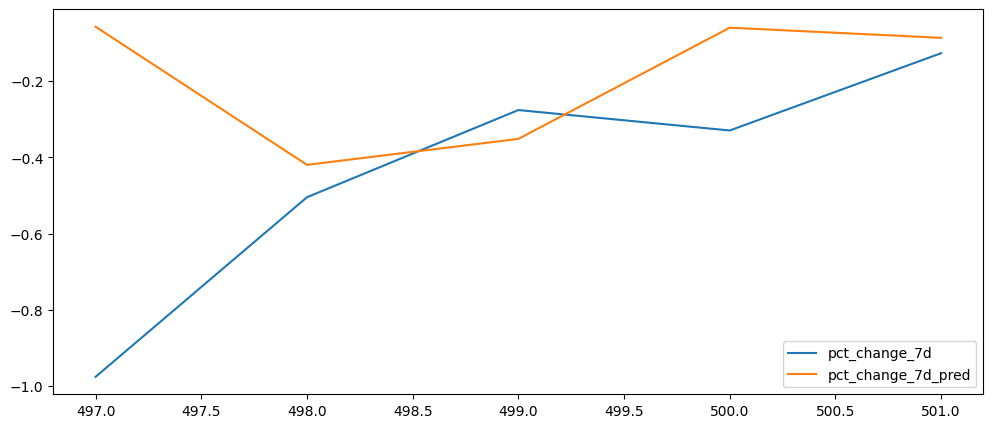

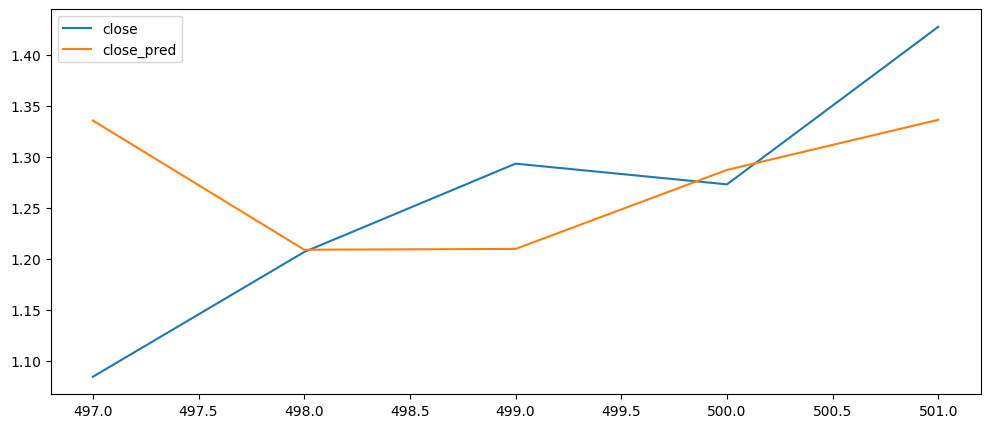

In [ ]:
test_vs_pred[['pct_change_7d','pct_change_7d_pred']].head(5).plot(figsize=(12,5))
test_vs_pred[['close','close_pred']].head(5).plot(figsize=(12,5))

#calculating rmse for predicted_pct_change and predicted_close in window size 5 days , 2 days and 30 days using 7d model

In [ ]:
from sklearn.metrics import mean_squared_error
import math
from statistics import mean
rmse_pct_change=math.sqrt(mean_squared_error(test_2_7d['close'].head(5),pred['close_pred'].head(5)))
rmse_close=math.sqrt(mean_squared_error(test_2_7d['pct_change_7d'].head(5),pred['pct_change_7d_pred'].head(5)))
print(rmse_pct_change,rmse_close)
rmse_pct_change=math.sqrt(mean_squared_error(test_2_7d['close'],pred['close_pred']))
rmse_close=math.sqrt(mean_squared_error(test_2_7d['pct_change_7d'],pred['pct_change_7d_pred']))
print(rmse_pct_change,rmse_close)
rmse_pct_change=math.sqrt(mean_squared_error(test_2_7d['close'].head(2),pred['close_pred'].head(2)))
rmse_close=math.sqrt(mean_squared_error(test_2_7d['pct_change_7d'].head(2),pred['pct_change_7d_pred'].head(2)))
print(rmse_pct_change,rmse_close)

0.12556983160499438 0.4317277715910922
0.38718663665984526 0.3845910244830602
0.17788926799066 0.6525793012153264


#unscaling data for 7d model

In [ ]:
unscaled_data = test_2_7d * std_scaler_2_7d.scale_ + std_scaler_2_7d.mean_
print(unscaled_data)

      close      volume  e_sentiment  s_sentiment  g_sentiment  \
497  288.35  66684141.0     0.631437     0.691813     0.368004   
498  296.73  29596256.0     0.628384     0.649972     0.352296   
499  302.66  28435053.0     0.628384     0.649972     0.352296   
500  301.27  19434168.0     0.632889     0.689098     0.373382   
501  311.85  20434580.0     0.632889     0.689098     0.373382   
502  310.87  21631820.0     0.703622     0.702156     0.376868   
503  314.60  16764315.0     0.703622     0.702156     0.376868   
504  315.80  12887699.0     0.703622     0.702156     0.376868   
505  318.82  14055614.0     0.666199     0.661612     0.357534   
506  319.78  13609704.0     0.607822     0.669794     0.362244   
507  320.55  16103071.0     0.607822     0.669794     0.362244   
508  328.77  19116921.0     0.607822     0.669794     0.362244   
509  329.19  16908948.0     0.627890     0.643634     0.360944   
510  336.31  17179403.0     0.627890     0.643634     0.360944   
511  332.7